# Solving Linear Systems with Backslash ( \\ )

In [1]:
using LinearAlgebra, Plots

## Square Linear Systems

A fundamental problem in linear algebra is solving systems of equations of the form $Ax = b$. In Julia, the most idiomatic, efficient, and numerically stable way to do this is with the backslash operator, `\`.

This is one of the most celebrated features of the language. It's not just convenient syntax; it's a powerful tool that analyzes the matrix `A` and chooses the best algorithm to solve the system.

In [2]:
A = [1 2; 3 4]
b = [5, 1]

# Solves the system Ax = b for the unknown vector x.
x = A \ b

2-element Vector{Float64}:
 -9.0
  7.0

While you can think of `A \ b` as being mathematically equivalent to $A^{-1}b$, it's crucial to understand that Julia **does not** compute the matrix inverse. Instead, it uses much more efficient and numerically stable methods, like LU factorization.

To verify the solution, we can check if $Ax$ is approximately equal to $b$. Use `≈` (typed as `\approx` + Tab) for floating-point comparisons.

In [3]:
# Check if the residual, A*x - b, is close to zero.
A*x ≈ b

true

The backslash operator is also optimized for solving systems with multiple right-hand sides. If `B` is a matrix, `A \ B` will solve $AX = B$ for the matrix $X$.

In [4]:
# Each column of B is a different right-hand side vector.
B = [5 7; 1 -3]

# The columns of X will be the solutions for the corresponding columns of B.
X = A \ B

2×2 Matrix{Float64}:
 -9.0  -17.0
  7.0   12.0

In [5]:
# Confirm that the solution is correct.
A*X ≈ B

true

The performance of `\` depends heavily on the structure of `A`. When you provide a specialized matrix type, Julia's multiple dispatch system automatically selects a faster, specialized algorithm. The difference is not minor, it can be astounding.

In [6]:
n = 2000

# Create a large SymTridiagonal matrix.
T = SymTridiagonal(2*ones(n), -ones(n-1))
b_rand = randn(n)
println("Solving with SymTridiagonal type:")
T \ b_rand; # Force JIT (Just-In-Time) compilation.
@time x_fast = T \ b_rand;

# Convert the same matrix to a generic, dense Matrix type.
T_full = Matrix(T)
println("\nSolving with dense Matrix type:")
T_full \ b_rand; # Force JIT (Just-In-Time) compilation.
@time x_slow = T_full \ b_rand;

Solving with SymTridiagonal type:
  0.000020 seconds (9 allocations: 47.086 KiB)

Solving with dense Matrix type:
  0.087842 seconds (9 allocations: 30.550 MiB)


## Overdetermined Systems and Linear Regression

What if the matrix `A` is not square? If `A` is a "tall" matrix (more rows than columns), the system $Ax=b$ is **overdetermined**, meaning there is generally no exact solution. 

In this case, `A \ b` computes the **least-squares solution** - the vector $x$ that minimizes the Euclidean norm of the residual, $\|Ax - b\|_2$. This is the foundation of linear regression.

Suppose we want to fit a set of $n$ points $(x_i, y_i)$ to a line $y = a + bx$. This can be expressed as an overdetermined system:

$$ 
\begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{pmatrix} 
\begin{pmatrix} a \\ b \end{pmatrix} 
\approx 
\begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}
$$

The backslash operator is the perfect tool to find the best-fit coefficients $a$ and $b$.

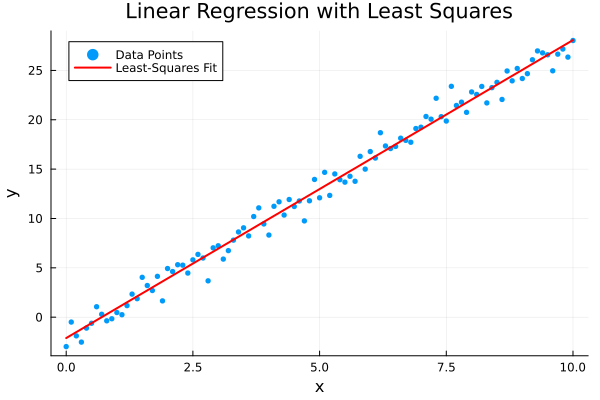

In [7]:
# 1. Generate some sample data with noise.
x_data = 0:0.1:10
n = length(x_data)
# y = 3x - 2 + random noise
y_data = 3 .* x_data .- 2 .+ randn(n)

# 2. Construct the matrix A (often called the design matrix).
# The first column of 1s is for the intercept 'a'.
# The second column of x values is for the slope 'b'.
A = [ones(n) x_data]

# 3. Solve for the coefficients [a, b] using the least-squares method.
coeffs = A \ y_data

# 4. Plot the results.
scatter(x_data, y_data, label="Data Points", markersize=3, markerstrokewidth=0)
plot!(x_data, coeffs[1] .+ coeffs[2] .* x_data, 
      label="Least-Squares Fit", 
      color=:red, 
      linewidth=2)
title!("Linear Regression with Least Squares")
xlabel!("x")
ylabel!("y")